In [1]:
import pandas as pd

df1= pd.read_csv('Slack_Private_19022018.csv')
#df2= pd.read_csv('20170316-191135 Slack-Public.csv')
del df1['Unnamed: 0']
#del df2['Unnamed: 0']

### Unique users

In [2]:
df_id_name=df1[['user_id','username']]

In [3]:
df_id_name=df_id_name.drop_duplicates()
df_id_name=df_id_name.reset_index(drop=True)

In [5]:
user_list=[]
for i in range(0,len(df_id_name)):
    a=df_id_name.iloc[i][0]
    user_list.append(a)

In [6]:
list1=[]
for i in range(0,len(df1)):
    a=len((df1.loc[i][4]).split(','))
    list1.append(a)

In [7]:
def find_username(id):
    for i in range(0,len(df_id_name)):
        a=df_id_name.iloc[i][0]
        if a == id:
            b=df_id_name.iloc[i][1]
            print(b)
    

In [8]:
find_username('U324431QA')

paulius


In [9]:
df1['member_count'] = pd.DataFrame(list1)

### Data preprocessing

In [2]:
import pandas as pd
import numpy as np

df1= pd.read_csv('Slack_Private_19022018.csv')

del df1['Unnamed: 0']

list1=[]
for i in range(0,len(df1)):
    a=len((df1.loc[i][4]).split(','))
    list1.append(a)

df1['member_count'] = pd.DataFrame(list1)

df1_one_to_one=df1[df1['member_count']<3]
df1_one_to_one=df1_one_to_one.reset_index(drop=True)

from_to=df1_one_to_one['members'].str[1:-1].str.split(',', expand=True).astype(str)
from_to= from_to.rename(columns={0: 'from',1: 'to'})

df1_with_from_to=pd.concat([df1_one_to_one, from_to], axis=1)

df1_with_from_to['to_tok']=df1_with_from_to['to'].replace("'", "").replace(" ", "")


list2=[]

for i in range(0,len(df1_with_from_to)):
    a=df1_with_from_to.iloc[i][10].replace("'", "").replace(" ", "")
    list2.append(a)
df1_with_from_to['to_tok'] = pd.DataFrame(list2)

list3=[]

for i in range(0,len(df1_with_from_to)):
    a=df1_with_from_to.iloc[i][9].replace("'", "").replace(" ", "")
    list3.append(a)
df1_with_from_to['from_tok'] = pd.DataFrame(list3)


df1_with_from_to['dest'] = np.where((df1_with_from_to['user_id'] == df1_with_from_to['to_tok']),df1_with_from_to['from_tok'], df1_with_from_to['to_tok'])

feat=['timestamp','user_id','message','dest']

df_cleaned=df1_with_from_to[feat]

df_cleaned=df_cleaned.dropna()
df_cleaned=df_cleaned.reset_index(drop=True)



In [3]:
df_cleaned

,timestamp,user_id,message,dest
0,1.481989e+09,U14K5KWC8,"Hey Dan, I'm in front of the office building t...",U02EBRG16
1,1.481989e+09,U02EBRG16,yep :slightly_smiling_face:,U14K5KWC8
2,1.481989e+09,U02EBRG16,or enter using the side door to the left,U14K5KWC8
3,1.481989e+09,U02EBRG16,then you'll be able to get to reception from t...,U14K5KWC8
4,1.481989e+09,U02EBRG16,i'm close so can help if you need me,U14K5KWC8
5,1.481989e+09,U14K5KWC8,All good I'm in :slightly_smiling_face:,U02EBRG16
6,1.481989e+09,U02EBRG16,great!,U14K5KWC8
7,1.481989e+09,U02EBRG16,hope you've had a good walk today,U14K5KWC8
8,1.481990e+09,U14K5KWC8,"Oh yeah we did, Andrea's having a power nap now",U02EBRG16
9,1.481990e+09,U02EBRG16,great :slightly_smiling_face:,U14K5KWC8


##### creating the adjacency matrix

In [11]:
adj_table=df_cleaned[['user_id','dest']]
adj_table=adj_table.drop_duplicates()
adj_table=adj_table.reset_index(drop=True)

In [12]:
list_edges=[]
for i in range(0,len(adj_table)):
    a=adj_table.iloc[i][0],adj_table.iloc[i][1]
    list_edges.append(a)

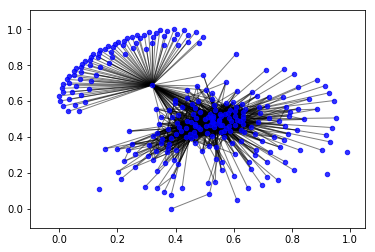

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(user_list)
G.add_edges_from(list_edges,weight=1)

#G.edge[1][2]['weight'] = 4
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color='b',node_size=20,alpha=0.8)
#nx.draw(G,pos=nx.spring_layout(G),nodelist=[0,1,2,3]) 
#
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5,arrows=True)
#edge_labels=dict([((u,v,),d['weight'])                 for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

#nx.draw_networkx_labels(G,pos=nx.spring_layout(G),{0,1,2,3,4,5},font_size=16)
#nx.draw(G,arrows=True)
'''
labels={}
labels[0]=r'$0$'
labels[1]=r'$1$'
labels[2]=r'$2$'
labels[3]=r'$3$'
labels[4]=r'$4$'


nx.draw_networkx_labels(G,pos,labels,font_size=16)
'''
plt.show()

### save a netowrk graph in pdf

In [14]:
from matplotlib import pylab
import networkx as nx

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.pdf")

In [17]:
degree_dict

[('U3KB7255G', 127),
 ('U02EBRG16', 103),
 ('U1Q840YMT', 77),
 ('U14K5KWC8', 76),
 ('U0C7MPQNP', 75),
 ('U02EEHT1J', 72),
 ('U06U2FKJ4', 71),
 ('U3LL88VK4', 67),
 ('U0LNDAUQ6', 65),
 ('U5BAAKU91', 65),
 ('U02EENFGK', 64),
 ('U0C9GGXLH', 61),
 ('U1K1P0ENR', 60),
 ('U0ZEL9V0F', 60),
 ('U0LN2N1M1', 60),
 ('U3DNVV2PP', 58),
 ('U02ELHV92', 55),
 ('U1JQT3G6B', 55),
 ('U35T4ABD0', 52),
 ('U054SL2DJ', 51),
 ('U04PVV50R', 51),
 ('U0LMZS9LL', 50),
 ('U0HJTJATX', 49),
 ('U3KET0W1W', 49),
 ('U44TLK613', 47),
 ('U02EEJB7E', 46),
 ('U0TDT85B6', 45),
 ('U41TLDGDC', 45),
 ('U62MPFGQ4', 45),
 ('U1STRDDQB', 44),
 ('U5H7C4H6Y', 42),
 ('U0LUANYAH', 41),
 ('U5FDKBJ00', 41),
 ('U0DQ5GBHP', 40),
 ('U0BS2CN6L', 39),
 ('U3YB68E3X', 38),
 ('U49GNA6NM', 38),
 ('U1G84H2MN', 37),
 ('U0RLB9PFY', 37),
 ('U1MMCC6LU', 35),
 ('U324431QA', 35),
 ('U4448DQSV', 35),
 ('U5T0HNKL5', 35),
 ('U2J6KKL1H', 34),
 ('U793UDNG6', 34),
 ('U269AC7GE', 32),
 ('U3KNQ0W05', 32),
 ('U056HCTHB', 31),
 ('U0CT2TPH8', 31),
 ('U5E92J44W', 31)

In [18]:
df_degreefreq = pd.DataFrame([degree_dict])
df_degreefreq =df_degreefreq .T



In [19]:
degree_dict=G.degree()
degree_dict=sorted(degree_dict.items(), key=lambda kv: kv[1], reverse=True)
degree_dict_list=list(degree_dict)
df_degreefreq[['userID', 'Degree']] = df_degreefreq[0].apply(pd.Series)
del df_degreefreq[0]

In [20]:
clustering_dict=nx.clustering(G)
clustering_dict=sorted(clustering_dict.items(), key=lambda kv: kv[1], reverse=True)

In [21]:
betweenness_dict=nx.betweenness_centrality(G)
betweenness_dict=sorted(betweenness_dict.items(), key=lambda kv: kv[1], reverse=True)

In [22]:
df_degreefreq

,userID,Degree
0,U3KB7255G,127.0
1,U02EBRG16,103.0
2,U1Q840YMT,77.0
3,U14K5KWC8,76.0
4,U0C7MPQNP,75.0
5,U02EEHT1J,72.0
6,U06U2FKJ4,71.0
7,U3LL88VK4,67.0
8,U0LNDAUQ6,65.0
9,U5BAAKU91,65.0


In [23]:
df_degreefreq['Degree'].value_counts()

1.0      102
3.0       21
2.0       17
4.0       11
6.0        7
5.0        6
8.0        6
16.0       5
35.0       4
9.0        4
10.0       4
0.0        3
45.0       3
20.0       3
18.0       3
60.0       3
15.0       3
13.0       3
12.0       3
7.0        3
31.0       3
55.0       2
51.0       2
49.0       2
65.0       2
41.0       2
38.0       2
37.0       2
34.0       2
32.0       2
26.0       2
11.0       2
14.0       2
19.0       2
28.0       2
58.0       1
103.0      1
77.0       1
76.0       1
75.0       1
72.0       1
71.0       1
67.0       1
64.0       1
61.0       1
52.0       1
17.0       1
50.0       1
21.0       1
47.0       1
46.0       1
22.0       1
44.0       1
42.0       1
24.0       1
40.0       1
39.0       1
27.0       1
127.0      1
Name: Degree, dtype: int64

In [24]:
df_degreefreq

,userID,Degree
0,U3KB7255G,127.0
1,U02EBRG16,103.0
2,U1Q840YMT,77.0
3,U14K5KWC8,76.0
4,U0C7MPQNP,75.0
5,U02EEHT1J,72.0
6,U06U2FKJ4,71.0
7,U3LL88VK4,67.0
8,U0LNDAUQ6,65.0
9,U5BAAKU91,65.0


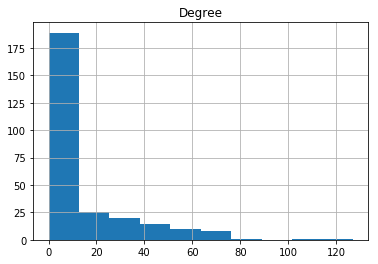

In [25]:
df_degreefreq.hist()
plt.show()

In [26]:
find_username('U3KB7255G')

trello
